# Exercise 3: Data-Driven Computing Architectures
In this exercise, we will work with Delta tables and the Medallion Architecture. You can gain 15 points, which will be awarded based on how effectively you implement the Bronze, Silver, and Gold layers, the quality of your data transformations and analysis, and how well your visualizations communicate insights. A well-designed pipeline should also allow new files to be uploaded and processed smoothly without requiring major modifications.

**Make sure to include clear explanations of what you did and why throughout your report and visualizations. Grading will also consider how well you justify your choices, so do not just present results but explain your reasoning.**

Useful links:
- https://docs.delta.io/latest/index.html
- https://delta.io/blog/delta-lake-medallion-architecture/

## Scenario

You're a Data Engineer at a manufacturing company that produces industrial components. The factory runs 10 specialized machines, producing drill bits, gears, shafts, conveyor belts, turbine parts, robot components, stamped metal, polished surfaces, laser-cut materials, and 3D-printed prototypes.

Each machine is equipped with sensors to track performance, while production logs record output and defects, and maintenance records document repairs. A team of production operators manages manufacturing, while maintenance operators handle scheduled and emergency repairs.

Recently, management has raised concerns about machine efficiency, defect rates, and maintenance costs, and they want continuous data-driven insights to improve operations. You have been given raw data from three sources:  

- **Sensor Data:** Real-time readings from industrial machines.
- **Production Logs:** Daily records of production output and defects.
- **Maintenance Records:** Logs of scheduled and emergency maintenance events.


---

## Your Assignment
Your task is to build a Medallion Architecture pipeline using Delta Lake to clean, structure, and analyze this data.
1. **Ingest the raw data** into **Bronze Layer** Delta tables.  
2. **Clean and standardize the data** in the **Silver Layer**.  
3. **Aggregate and generate business insights** in the **Gold Layer**.  
4. **Visualize key metrics** to make informed decisions, using for example Matplotlib or Seaborn.

---

## Data Description
The csv files are available in the `/shared` folder in Noppe.
## **1. Sensor Data**  
Captures real-time sensor readings from machines, tracking temperature, vibration, power consumption, and operational status.

### **Key Fields:**  
- `sensor_id`: Unique identifier for the sensor.  
- `machine`: Name of the machine.
- `time_stamp`: Timestamp of the sensor reading.  
- `temp C`: Temperature reading (°C).  
- `vibration_lvl`: Vibration level reading.  
- `power_kW`: Power consumption (kW).  
- `def_ct`: Number of defective sensor readings.  
- `status_flag`: Operational status (e.g., "Running", "Stopped").  
- `noise_val`: Random noise factor in the data.  
- `extra_param`: Additional machine-related parameter.  

---

## **2. Production Logs**  
Tracks machine output, defect rates, and operator activity. Machines in poor condition tend to produce more defects.

### **Key Fields:**  
- `log_id`: Unique identifier for the production log.  
- `product_type`: Type of product produced.  
- `units_produced`: Number of units produced.  
- `defective_units`: Number of defective units.  
- `time_stamp`: Timestamp of production record.  
- `machine`: Machine responsible for production.  
- `operator_id`: Identifier of the operator overseeing production.  
- `remarks`: Additional notes about the production process (e.g., quality concerns, machine adjustments).  
- `batch_info`: Batch identifier for tracking specific production runs.  

---

## **3. Maintenance Records**  
Logs maintenance activities, including scheduled upkeep, emergency repairs, and associated costs. Machines in poor condition require more frequent emergency maintenance.

### **Key Fields:**  
- `maintenance_id`: Unique identifier for the maintenance event.  
- `machine`: Machine undergoing maintenance.  
- `maintenance_date`: Timestamp of maintenance event.  
- `maintenance_type`: Type of maintenance (Scheduled, Unscheduled, Emergency).  
- `duration_minutes`: Length of the maintenance event.  
- `cost`: Cost of the maintenance.  
- `operator`: Identifier of the maintenance operator performing the task.  
- `notes`: Description of the maintenance issue or action taken.  

---

## **4. Operator Dimension Table (Predefined Silver Table)**  
A reference table with details about production and maintenance operators.

### **Key Fields:**  
- `operator_id`: Unique identifier for the operator.  
- `operator_name`: Full name of the operator.  
- `operator_type`: "Production" or "Maintenance".  
 

---

## Medallion Architecture Implementation

### **1. Bronze Layer – Raw Data Storage** (2p)
- Ingest raw data as-is into Delta tables.
- No transformations at this stage.

### **2. Silver Layer – Cleaning & Standardization** (3p) 

**For example:**
- Convert columns into a proper format.  
- Rename columns for consistency, for example (`time_stamp` → `timestamp`).  
- Remove duplicate records.


### **3. Gold Layer – Business Insights** (4p)
**For example:**
- Aggregate sensor, production, and maintenance data to create daily machine performance metrics.  
- Join tables to uncover correlations between sensor readings, defects, and maintenance events.  
- Visualize the tables and metrics.
---

## Example Visualizations:

### **Daily Sensor Metrics**
- Average temperature, vibration, and power consumption per machine.  
- Number of downtime events (`status_flag = "Stopped"`).  

### **Daily Production Metrics**
- Total units produced and defective units per machine.  
- Production yield: (total_units_produced - defective_units) / total_units_produced


### **Daily Maintenance Metrics**
- Number of maintenance events per machine.  
- Total maintenance costs per machine.  

### **Advanced Insights**
- Correlation analysis between high vibration levels and production defects.  
- Identify the most frequent operator per machine per day.  
- Estimate energy consumption trends over time.  

**You are encouraged to explore and define your own insights.**

---

## Example Directory Structure

```plaintext
data_lake/
├── bronze/
│   ├── sensor_data_bronze/          # Raw Sensor Data (Delta table)
│   ├── production_data_bronze/      # Raw Production Data (Delta table)
│   └── maintenance_data_bronze/     # Raw Maintenance Data (Delta table)
├── silver/
│   ├── sensor_data_silver/          # Cleaned Sensor Data (Delta table)
│   ├── production_data_silver/      # Cleaned Production Data (Delta table)
│   ├── maintenance_data_silver/     # Cleaned Maintenance Data (Delta table)
│   └── dim_operator_silver/         # Operator Dimension Table (Delta table)
└── gold/
  └── gold_machine_performance/  # Aggregated Machine Performance (Delta table)
```
---

In [3]:
pip install delta-spark==3.0.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 5.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
from pyspark.sql import SparkSession
from delta import configure_spark_with_delta_pip

# Configure the Spark session with Delta support
builder = SparkSession.builder \
    .appName("Exercise1") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
    .config("spark.jars.packages", "io.delta:delta-core_2.12:3.0.0")

# Create the Spark session
spark = configure_spark_with_delta_pip(builder).getOrCreate()

print("Spark session with Delta Lake configured successfully!")
spark

Spark session with Delta Lake configured successfully!


## Imports

In [3]:
from pyspark.sql.functions import col, sum, to_date, avg, count, when, isnan
from pyspark.sql.types import DoubleType, IntegerType, TimestampType
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 1. Bronze Layer – Raw Data Storage

### Sensor_data

In [4]:
sensor_data_path = "sensor_data.csv"

# Read the raw sensor data from CSV
sensor_df = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(sensor_data_path)

# Whitespaces in the columns names were giving error -> all spaces were changed with underlines
sensor_df = sensor_df.select([col(c).alias(c.replace(" ", "_")) for c in sensor_df.columns])

sensor_df.show(5)
sensor_df.printSchema()

+--------------------+--------------+-------------------+------+-------------+--------+------+-----------+---------+-----------+
|           sensor_id|       machine|         time_stamp|temp_C|vibration_lvl|power_kW|def_ct|status_flag|noise_val|extra_param|
+--------------------+--------------+-------------------+------+-------------+--------+------+-----------+---------+-----------+
|e0310580-9228-434...|DrillPress-100|2024-10-01 00:00:00|  48.1|         1.03|    20.9|     0|    Stopped|    0.505|        103|
|496a0d42-dd46-441...|  CNC-Mill-200|2024-10-01 00:02:00|  48.0|          0.9|   19.25|     0|    Stopped|    0.716|        189|
|e4bf3234-33f4-42d...|     Lathe-300|2024-10-01 00:04:00| 45.23|         1.07|   22.06|     0|    Stopped|     0.22|        175|
|aeb1a7d1-0f1c-48d...|  Conveyor-400|2024-10-01 00:06:00| 52.82|         1.81|   18.92|     0|    Stopped|    0.869|        197|
|f38f4927-e44b-447...|   Turbine-500|2024-10-01 00:08:00| 52.57|         1.94|   22.67|     0|   

In [5]:
# Write raw data to Bronze Layer as a Delta table
bronze_sensor_path = "data_lake/bronze/sensor_data_bronze/"
os.makedirs(bronze_sensor_path, exist_ok=True)

sensor_df.write.format("delta") \
    .mode("append") \
    .save(bronze_sensor_path)

print("Raw sensor data successfully ingested into the Bronze Layer.")
bronze_sensor_df = spark.read.format("delta").load(bronze_sensor_path)

Raw sensor data successfully ingested into the Bronze Layer.


### Production_data

In [6]:
production_data_path = "production_data.csv"

# Read the raw production data from CSV
production_df = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(production_data_path)

# Whitespaces in the columns names were giving error -> all spaces were changed with underlines
production_df = production_df.select([col(c).alias(c.replace(" ", "_")) for c in production_df.columns])

production_df.show(5)
production_df.printSchema()

+--------------------+----------------+--------------+---------------+-------------------+--------------+--------------------+-----------+--------------------+
|              log_id|    product_type|units_produced|defective_units|         time_stamp|   MachineName|             remarks|operator_id|          batch_info|
+--------------------+----------------+--------------+---------------+-------------------+--------------+--------------------+-----------+--------------------+
|831bdeda-388c-4f3...|     Turbine Hub|            96|              5|2024-10-01 10:05:00|   Turbine-500|Minor delays due ...|       OP17|Batch-Turbine-500...|
|41274f57-82a0-4a4...|Polished Surface|            87|              4|2024-10-01 11:59:00|   Grinder-800|Normal operations...|       OP14|Batch-Grinder-800...|
|7a943af7-dc35-4e7...|       Drill Bit|           137|              8|2024-10-01 21:49:00|DrillPress-100|Slight quality co...|       OP20|Batch-DrillPress-...|
|5365b96b-62e9-470...|       Drill Bit| 

In [7]:
# Write raw data to Bronze Layer as a Delta table
bronze_production_path = "data_lake/bronze/production_data_bronze/"
os.makedirs(bronze_production_path, exist_ok=True)

production_df.write.format("delta") \
    .mode("append") \
    .save(bronze_production_path)

print("Raw production data successfully ingested into the Bronze Layer.")
bronze_production_df = spark.read.format("delta").load(bronze_production_path)

Raw production data successfully ingested into the Bronze Layer.


### Maintenance Data

In [8]:
maintenance_data_path = "maintenance_data.csv"

# Read the raw production data from CSV
maintenance_df = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(maintenance_data_path)

# Whitespaces in the columns names were giving error -> all spaces were changed with underlines
maintenance_df = maintenance_df.select([col(c).alias(c.replace(" ", "_")) for c in maintenance_df.columns])

maintenance_df.show(5)
maintenance_df.printSchema()

+--------------------+--------------+-------------------+----------------+----------------+-------+--------+--------------------+
|      maintenance_id|       machine|   maintenance_date|maintenance_type|duration_minutes|   cost|operator|               notes|
+--------------------+--------------+-------------------+----------------+----------------+-------+--------+--------------------+
|e0c400c6-e7a8-4b4...|  Conveyor-400|2024-10-02 05:48:00|       Emergency|             140|1312.39|   MT104|Critical failure ...|
|0f2cbacd-52d6-49a...|DrillPress-100|2024-10-03 03:46:00|     Unscheduled|              49| 263.19|   MT105|Replaced small co...|
|48ab287e-4e96-462...|  Conveyor-400|2024-10-03 18:15:00|       Scheduled|              66| 284.63|   MT101|Calibrated machin...|
|b170c9d2-c3fc-4c9...|  RobotArm-600|2024-10-03 03:04:00|       Scheduled|              91| 265.16|   MT103|Replaced worn-out...|
|4f6c00a5-5eaa-425...|  Conveyor-400|2024-10-04 13:04:00|       Scheduled|              99

In [9]:
# Write raw data to Bronze Layer as a Delta table
bronze_maintenance_path = "data_lake/bronze/maintenance_data_bronze/"
os.makedirs(bronze_maintenance_path, exist_ok=True)

maintenance_df.write.format("delta") \
    .mode("append") \
    .save(bronze_maintenance_path)

print("Raw maintenance data successfully ingested into the Bronze Layer.")
bronze_maintenance_df = spark.read.format("delta").load(bronze_maintenance_path)

Raw maintenance data successfully ingested into the Bronze Layer.


## Silver Layer – Cleaning & Standardization

### Sensor Data

#### Renaming Columns

In [10]:
bronze_sensor_df.columns

['sensor_id',
 'machine',
 'time_stamp',
 'temp_C',
 'vibration_lvl',
 'power_kW',
 'def_ct',
 'status_flag',
 'noise_val',
 'extra_param']

In [11]:
silver_sensor_df = (
    bronze_sensor_df.withColumnRenamed("time_stamp", "timestamp")
                    .withColumnRenamed("temp_C", "temperature_celsius")
                    .withColumnRenamed("vibration_lvl", "vibration_level")
                    .withColumnRenamed("power_kW", "power_kw")
                    .withColumnRenamed("def_ct", "defect_count")
)
silver_sensor_df.columns

['sensor_id',
 'machine',
 'timestamp',
 'temperature_celsius',
 'vibration_level',
 'power_kw',
 'defect_count',
 'status_flag',
 'noise_val',
 'extra_param']

#### Changing Types

In [12]:
silver_sensor_df.dtypes

[('sensor_id', 'string'),
 ('machine', 'string'),
 ('timestamp', 'string'),
 ('temperature_celsius', 'string'),
 ('vibration_level', 'string'),
 ('power_kw', 'string'),
 ('defect_count', 'string'),
 ('status_flag', 'string'),
 ('noise_val', 'string'),
 ('extra_param', 'string')]

In [13]:
silver_sensor_df = silver_sensor_df \
    .withColumn("timestamp", col("timestamp").cast(TimestampType())) \
    .withColumn("temperature_celsius", col("temperature_celsius").cast(DoubleType())) \
    .withColumn("vibration_level", col("vibration_level").cast(DoubleType())) \
    .withColumn("power_kw", col("power_kw").cast(DoubleType())) \
    .withColumn("defect_count", col("defect_count").cast(IntegerType())) \
    .withColumn("noise_val", col("noise_val").cast(DoubleType())) \
    .withColumn("extra_param", col("extra_param").cast(DoubleType()))

silver_sensor_df.dtypes

[('sensor_id', 'string'),
 ('machine', 'string'),
 ('timestamp', 'timestamp'),
 ('temperature_celsius', 'double'),
 ('vibration_level', 'double'),
 ('power_kw', 'double'),
 ('defect_count', 'int'),
 ('status_flag', 'string'),
 ('noise_val', 'double'),
 ('extra_param', 'double')]

#### Checking Missing Values 

In [14]:
# Count missing (NaN/null) values in each column
missing_values = silver_sensor_df.select(
    [count(when(col(c).isNull(), c)).alias(c) for c in silver_sensor_df.columns]
)
missing_values.show()

+---------+-------+---------+-------------------+---------------+--------+------------+-----------+---------+-----------+
|sensor_id|machine|timestamp|temperature_celsius|vibration_level|power_kw|defect_count|status_flag|noise_val|extra_param|
+---------+-------+---------+-------------------+---------------+--------+------------+-----------+---------+-----------+
|      108|    116|      336|                256|            292|     312|         336|         84|      252|        324|
+---------+-------+---------+-------------------+---------------+--------+------------+-----------+---------+-----------+



In [15]:
# Dropping NaN/null values - removing rows which contain them
silver_sensor_df = silver_sensor_df.dropna()
missing_values = silver_sensor_df.select(
    [count(when(col(c).isNull(), c)).alias(c) for c in silver_sensor_df.columns]
)

missing_values.show()

+---------+-------+---------+-------------------+---------------+--------+------------+-----------+---------+-----------+
|sensor_id|machine|timestamp|temperature_celsius|vibration_level|power_kw|defect_count|status_flag|noise_val|extra_param|
+---------+-------+---------+-------------------+---------------+--------+------------+-----------+---------+-----------+
|        0|      0|        0|                  0|              0|       0|           0|          0|        0|          0|
+---------+-------+---------+-------------------+---------------+--------+------------+-----------+---------+-----------+



In [16]:
unique_machines = silver_sensor_df.select("machine").distinct()
unique_machines.show()

+---------------+
|        machine|
+---------------+
|   Conveyor-400|
|LaserCutter-900|
|    Grinder-800|
|        unknown|
|   CNC-Mill-200|
|   RobotArm-600|
|      Lathe-300|
| DrillPress-100|
|      Press-700|
| 3DPrinter-1000|
|    Turbine-500|
|            N/A|
+---------------+



In [17]:
silver_sensor_df = silver_sensor_df.filter((silver_sensor_df.machine != "N/A") & (silver_sensor_df.machine != "unknown"))

In [18]:
unique_machines = silver_sensor_df.select("machine").distinct()
unique_machines.show()

+---------------+
|        machine|
+---------------+
|   Conveyor-400|
|LaserCutter-900|
|    Grinder-800|
|   CNC-Mill-200|
|   RobotArm-600|
|      Lathe-300|
| DrillPress-100|
|      Press-700|
| 3DPrinter-1000|
|    Turbine-500|
+---------------+



#### Checking Duplicates

In [19]:
print(f"Number of rows before removing duplicates: {silver_sensor_df.count()}")
silver_sensor_df = silver_sensor_df.dropDuplicates()
print(f"Number of rows after removing duplicates: {silver_sensor_df.count()}")

Number of rows before removing duplicates: 198140
Number of rows after removing duplicates: 49535


#### Checking Anomalies

In [20]:
silver_sensor_df.describe().show()

+-------+--------------------+--------------+-------------------+------------------+------------------+------------------+-----------+-------------------+------------------+
|summary|           sensor_id|       machine|temperature_celsius|   vibration_level|          power_kw|      defect_count|status_flag|          noise_val|       extra_param|
+-------+--------------------+--------------+-------------------+------------------+------------------+------------------+-----------+-------------------+------------------+
|  count|               49535|         49535|              49535|             49535|             49535|             49535|      49535|              49535|             49535|
|   mean|                NULL|          NULL|  53.32816715453714|1.8233606540829692|21.787283940647985|0.1859695165034824|       NULL| 0.5002125971535277| 150.0378318360755|
| stddev|                NULL|          NULL| 3.9770878025493053|0.5092000216898719| 1.815363019171402|0.6327945751348232|       N

In [21]:
negative_vibration_count = silver_sensor_df.filter(col("vibration_level") < 0).count()
print(f"Rows with negative vibration_level: {negative_vibration_count}")

Rows with negative vibration_level: 18


In [22]:
silver_sensor_df = silver_sensor_df.filter(col("vibration_level") >= 0) # vibration levels for machines should not be negative in a physical sense -> could be an error in data reading

#### Saving

In [23]:
silver_sensor_path = "data_lake/silver/sensor_data_silver/"
os.makedirs(silver_sensor_path, exist_ok=True)

silver_sensor_df.write.format("delta") \
    .mode("overwrite") \
    .save(silver_sensor_path)

print("Cleaned sensor data successfully stored in the Silver Layer.")

Cleaned sensor data successfully stored in the Silver Layer.


### Production Data

#### Renaming Columns

In [24]:
bronze_production_df.columns

['log_id',
 'product_type',
 'units_produced',
 'defective_units',
 'time_stamp',
 'MachineName',
 'remarks',
 'operator_id',
 'batch_info']

In [25]:
silver_production_df = (
    bronze_production_df.withColumnRenamed("time_stamp", "timestamp") 
                        .withColumnRenamed("MachineName", "machine") 
)

silver_production_df.columns

['log_id',
 'product_type',
 'units_produced',
 'defective_units',
 'timestamp',
 'machine',
 'remarks',
 'operator_id',
 'batch_info']

#### Changing Types

In [26]:
silver_production_df.dtypes

[('log_id', 'string'),
 ('product_type', 'string'),
 ('units_produced', 'string'),
 ('defective_units', 'string'),
 ('timestamp', 'string'),
 ('machine', 'string'),
 ('remarks', 'string'),
 ('operator_id', 'string'),
 ('batch_info', 'string')]

In [27]:
silver_production_df = silver_production_df \
    .withColumn("timestamp", col("timestamp").cast(TimestampType())) \
    .withColumn("units_produced", col("units_produced").cast(IntegerType())) \
    .withColumn("defective_units", col("defective_units").cast(IntegerType()))
silver_production_df.dtypes

[('log_id', 'string'),
 ('product_type', 'string'),
 ('units_produced', 'int'),
 ('defective_units', 'int'),
 ('timestamp', 'timestamp'),
 ('machine', 'string'),
 ('remarks', 'string'),
 ('operator_id', 'string'),
 ('batch_info', 'string')]

#### Checking Missing Values

In [28]:
# Checking for NaN/null values
silver_production_df.select(
    [count(when(col(c).isNull(), c)).alias(c) for c in silver_production_df.columns]
).show()

+------+------------+--------------+---------------+---------+-------+-------+-----------+----------+
|log_id|product_type|units_produced|defective_units|timestamp|machine|remarks|operator_id|batch_info|
+------+------------+--------------+---------------+---------+-------+-------+-----------+----------+
|     8|           4|            20|             16|        8|     12|     16|          4|         8|
+------+------------+--------------+---------------+---------+-------+-------+-----------+----------+



In [29]:
# Removing NaN/null values
silver_production_df = silver_production_df.dropna()
silver_production_df.select(
    [count(when(col(c).isNull(), c)).alias(c) for c in silver_production_df.columns]
).show()

+------+------------+--------------+---------------+---------+-------+-------+-----------+----------+
|log_id|product_type|units_produced|defective_units|timestamp|machine|remarks|operator_id|batch_info|
+------+------------+--------------+---------------+---------+-------+-------+-----------+----------+
|     0|           0|             0|              0|        0|      0|      0|          0|         0|
+------+------------+--------------+---------------+---------+-------+-------+-----------+----------+



In [30]:
unique_machines = silver_production_df.select("machine").distinct()
unique_machines.show()

+---------------+
|        machine|
+---------------+
|   Conveyor-400|
|LaserCutter-900|
|    Grinder-800|
|        unknown|
|   CNC-Mill-200|
|   RobotArm-600|
|      Lathe-300|
| DrillPress-100|
|      Press-700|
| 3DPrinter-1000|
|    Turbine-500|
|            N/A|
+---------------+



In [31]:
silver_production_df = silver_production_df.filter((silver_production_df.machine != "N/A") & (silver_production_df.machine != "unknown"))

In [32]:
unique_machines = silver_production_df.select("machine").distinct()
unique_machines.show()

+---------------+
|        machine|
+---------------+
|   Conveyor-400|
|LaserCutter-900|
|    Grinder-800|
|   CNC-Mill-200|
|   RobotArm-600|
|      Lathe-300|
| DrillPress-100|
|      Press-700|
| 3DPrinter-1000|
|    Turbine-500|
+---------------+



#### Checking Duplicates

In [33]:
print(f"Number of rows before removing duplicates: {silver_production_df.count()}")
silver_production_df = silver_production_df.dropDuplicates()
print(f"Number of rows after removing duplicates: {silver_production_df.count()}")


Number of rows before removing duplicates: 11900
Number of rows after removing duplicates: 2975


#### Checking Anomalies

In [34]:
silver_production_df.describe().show()

+-------+--------------------+---------------+------------------+------------------+--------------+--------------------+-----------+--------------------+
|summary|              log_id|   product_type|    units_produced|   defective_units|       machine|             remarks|operator_id|          batch_info|
+-------+--------------------+---------------+------------------+------------------+--------------+--------------------+-----------+--------------------+
|  count|                2975|           2975|              2975|              2975|          2975|                2975|       2975|                2975|
|   mean|                NULL|           NULL|125.15327731092437|22.805042016806723|          NULL|                NULL|       NULL|                NULL|
| stddev|                NULL|           NULL| 35.66397813052963| 7.910582247185824|          NULL|                NULL|       NULL|                NULL|
|    min|00130a22-b979-4b9...|3D Printed Part|                42|           

In [35]:
negative_defective_unit_count = silver_production_df.filter(col("defective_units") < 0).count()
print(f"Rows with negative defective units: {negative_defective_unit_count}")

Rows with negative defective units: 15


In [36]:
silver_production_df = silver_production_df.filter(col("defective_units") >= 0) # defective units cannot be negative -> error

#### Saving

In [37]:
silver_production_path = "data_lake/silver/production_data_silver/"
os.makedirs(silver_production_path, exist_ok=True)

silver_production_df.write.format("delta") \
    .mode("overwrite") \
    .save(silver_production_path)

print("Cleaned production data successfully saved to the Silver Layer.")

Cleaned production data successfully saved to the Silver Layer.


### Maintenance Data

#### Renaming Columns

In [38]:
bronze_maintenance_df.columns

['maintenance_id',
 'machine',
 'maintenance_date',
 'maintenance_type',
 'duration_minutes',
 'cost',
 'operator',
 'notes']

In [39]:
silver_maintenance_df = bronze_maintenance_df \
    .withColumnRenamed("maintenance_date", "timestamp") \
    .withColumnRenamed("operator", "operator_id")
silver_maintenance_df.columns

['maintenance_id',
 'machine',
 'timestamp',
 'maintenance_type',
 'duration_minutes',
 'cost',
 'operator_id',
 'notes']

#### Changing Types

In [40]:
silver_maintenance_df.dtypes

[('maintenance_id', 'string'),
 ('machine', 'string'),
 ('timestamp', 'timestamp'),
 ('maintenance_type', 'string'),
 ('duration_minutes', 'int'),
 ('cost', 'double'),
 ('operator_id', 'string'),
 ('notes', 'string')]

In [41]:
silver_maintenance_df = silver_maintenance_df \
    .withColumn("timestamp", col("timestamp").cast(TimestampType())) \
    .withColumn("duration_minutes", col("duration_minutes").cast(IntegerType())) \
    .withColumn("cost", col("cost").cast(DoubleType()))
silver_maintenance_df.dtypes

[('maintenance_id', 'string'),
 ('machine', 'string'),
 ('timestamp', 'timestamp'),
 ('maintenance_type', 'string'),
 ('duration_minutes', 'int'),
 ('cost', 'double'),
 ('operator_id', 'string'),
 ('notes', 'string')]

#### Checking Missing Values

In [42]:
silver_maintenance_df.select(
    [count(when(col(c).isNull(), c)).alias(c) for c in silver_maintenance_df.columns]
).show()

+--------------+-------+---------+----------------+----------------+----+-----------+-----+
|maintenance_id|machine|timestamp|maintenance_type|duration_minutes|cost|operator_id|notes|
+--------------+-------+---------+----------------+----------------+----+-----------+-----+
|             0|      0|        0|               0|               0|   0|          0|    0|
+--------------+-------+---------+----------------+----------------+----+-----------+-----+



In [43]:
unique_machines = silver_maintenance_df.select("machine").distinct()
unique_machines.show()

+---------------+
|        machine|
+---------------+
|   Conveyor-400|
|LaserCutter-900|
|    Grinder-800|
|   CNC-Mill-200|
|   RobotArm-600|
|      Lathe-300|
| DrillPress-100|
|      Press-700|
| 3DPrinter-1000|
|    Turbine-500|
+---------------+



#### Checking Duplicates

In [44]:
print(f"Number of rows before removing duplicates: {silver_maintenance_df.count()}")
silver_maintenance_df = silver_maintenance_df.dropDuplicates()
print(f"Number of rows after removing duplicates: {silver_maintenance_df.count()}")

Number of rows before removing duplicates: 984
Number of rows after removing duplicates: 246


#### Checking Anomalies

In [45]:
silver_maintenance_df.describe().show()

+-------+--------------------+--------------+----------------+-----------------+------------------+-----------+--------------------+
|summary|      maintenance_id|       machine|maintenance_type| duration_minutes|              cost|operator_id|               notes|
+-------+--------------------+--------------+----------------+-----------------+------------------+-----------+--------------------+
|  count|                 246|           246|             246|              246|               246|        246|                 246|
|   mean|                NULL|          NULL|            NULL|104.3170731707317| 570.1231707317074|       NULL|                NULL|
| stddev|                NULL|          NULL|            NULL|56.06116442151969|403.81712937623195|       NULL|                NULL|
|    min|002999f5-c036-476...|3DPrinter-1000|       Emergency|               31|            164.19|      MT100|Addressed minor l...|
|    max|fdf1f306-6ace-4d8...|   Turbine-500|     Unscheduled|       

#### Saving

In [46]:
silver_maintenance_path = "data_lake/silver/maintenance_data_silver/"
os.makedirs(silver_maintenance_path, exist_ok=True)

silver_maintenance_df.write.format("delta") \
    .mode("overwrite") \
    .save(silver_maintenance_path)

print("Cleaned maintenance data successfully saved to the Silver Layer.")

Cleaned maintenance data successfully saved to the Silver Layer.


### Operator Dimension Table

In [47]:
dim_operator_path = "dim_operator.csv"

dim_operator_df = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(dim_operator_path)
dim_operator_df.show(5)
dim_operator_df.printSchema()

+-----------+---------------+-------------+
|operator_id|  operator_name|operator_type|
+-----------+---------------+-------------+
|      MT100|   Allison Hill|  Maintenance|
|       OP12|    Noah Rhodes|   Production|
|      MT101|Angie Henderson|  Maintenance|
|      MT102|  Daniel Wagner|  Maintenance|
|       OP18|Cristian Santos|   Production|
+-----------+---------------+-------------+
only showing top 5 rows

root
 |-- operator_id: string (nullable = true)
 |-- operator_name: string (nullable = true)
 |-- operator_type: string (nullable = true)



In [48]:
# Save to Silver Layer as a Delta table
silver_operator_path = "data_lake/silver/dim_operator_silver/"
os.makedirs(silver_operator_path, exist_ok=True)

dim_operator_df.write.format("delta") \
    .mode("overwrite") \
    .save(silver_operator_path)

print("Operator Dimension Table successfully saved to the Silver Layer.")

Operator Dimension Table successfully saved to the Silver Layer.


## Gold Layer – Business Insights

In [49]:
# Load Silver Layer tables
sensor_df = spark.read.format("delta").load("data_lake/silver/sensor_data_silver")
production_df = spark.read.format("delta").load("data_lake/silver/production_data_silver")
maintenance_df = spark.read.format("delta").load("data_lake/silver/maintenance_data_silver")
operator_df = spark.read.format("delta").load("data_lake/silver/dim_operator_silver")

### Daily Sensor Metrics

In [50]:
# Convert timestamp to date for daily aggregation
sensor_metrics = sensor_df.withColumn("date", to_date(col("timestamp"))) \
    .groupBy("machine", "date") \
    .agg(
        avg("temperature_celsius").alias("avg_temp_celsius"),
        avg("vibration_level").alias("avg_vibration_level"),
        avg("power_kW").alias("avg_power_kW"),
        sum("defect_count").alias("total_defective_sensor_readings"),
        count(when(col("status_flag") == "Stopped", True)).alias("downtime_count")
    ) \
    .orderBy(col("downtime_count").desc())
sensor_metrics.show()

+---------------+----------+------------------+-------------------+------------------+-------------------------------+--------------+
|        machine|      date|  avg_temp_celsius|avg_vibration_level|      avg_power_kW|total_defective_sensor_readings|downtime_count|
+---------------+----------+------------------+-------------------+------------------+-------------------------------+--------------+
|   CNC-Mill-200|2024-11-28| 59.22699999999999| 1.8848000000000003|           22.1024|                              2|            50|
|    Grinder-800|2024-10-22|           51.4114| 1.8628000000000002|21.371000000000002|                             18|            50|
|      Press-700|2024-10-08| 52.92700000000001|             1.7162|           21.3132|                             15|            50|
|    Turbine-500|2024-11-27| 55.72120000000001|             1.9028|21.992800000000003|                              7|            50|
|   Conveyor-400|2024-10-24|            54.218|             1.

### Daily Production Metrics

In [51]:
# Convert timestamp to date for daily aggregation
production_metrics = production_df.withColumn("date", to_date(col("timestamp"))) \
    .groupBy("machine", "date") \
    .agg(
        sum("units_produced").alias("total_units_produced"),
        sum("defective_units").alias("total_defective_units"),
        (sum("defective_units") / sum("units_produced")).alias("defect_rate"),
        ((sum("units_produced") - sum("defective_units")) / sum("units_produced")).alias("production_yield")
    ) \
    .orderBy(col("defect_rate").desc())
production_metrics.show()

+--------------+----------+--------------------+---------------------+-------------------+------------------+
|       machine|      date|total_units_produced|total_defective_units|        defect_rate|  production_yield|
+--------------+----------+--------------------+---------------------+-------------------+------------------+
|   Turbine-500|2024-11-27|                 114|                   27|0.23684210526315788|0.7631578947368421|
|   Grinder-800|2024-11-13|                  81|                   19| 0.2345679012345679|0.7654320987654321|
|     Lathe-300|2024-10-15|                  65|                   15|0.23076923076923078|0.7692307692307693|
|     Press-700|2024-11-27|                 265|                   61|0.23018867924528302| 0.769811320754717|
|   Turbine-500|2024-12-02|                 340|                   78|0.22941176470588234|0.7705882352941177|
|   Turbine-500|2024-11-30|                 315|                   72|0.22857142857142856|0.7714285714285715|
|     Pres

### Daily Maintenance Metrics

In [52]:
maintenance_metrics = maintenance_df.withColumn("date", to_date(col("timestamp"))) \
    .groupBy("machine", "date") \
    .agg(
        sum("duration_minutes").alias("total_maintenance_duration"),
        count(when(col("maintenance_type") == "Scheduled", True)).alias("scheduled_maintenance"),
        count(when(col("maintenance_type") == "Unscheduled", True)).alias("unscheduled_maintenance"),
        count(when(col("maintenance_type") == "Emergency", True)).alias("emergency_maintenance"),
        sum("cost").alias("total_maintenance_cost")
    ) \
    .orderBy(col("total_maintenance_cost").desc())
maintenance_metrics.show()

+---------------+----------+--------------------------+---------------------+-----------------------+---------------------+----------------------+
|        machine|      date|total_maintenance_duration|scheduled_maintenance|unscheduled_maintenance|emergency_maintenance|total_maintenance_cost|
+---------------+----------+--------------------------+---------------------+-----------------------+---------------------+----------------------+
|   Conveyor-400|2024-11-17|                       209|                    0|                      0|                    1|                1497.8|
|LaserCutter-900|2024-12-01|                       216|                    0|                      0|                    1|               1486.73|
|   RobotArm-600|2025-01-04|                       176|                    0|                      0|                    1|               1486.64|
|   RobotArm-600|2024-12-21|                       179|                    0|                      0|                 

### Joining Data

In [53]:
# Join sensor, production, and maintenance metrics on machine and date
gold_df = sensor_metrics \
    .join(production_metrics, ["machine", "date"], "left") \
    .join(maintenance_metrics, ["machine", "date"], "left")

gold_df.columns

['machine',
 'date',
 'avg_temp_celsius',
 'avg_vibration_level',
 'avg_power_kW',
 'total_defective_sensor_readings',
 'downtime_count',
 'total_units_produced',
 'total_defective_units',
 'defect_rate',
 'production_yield',
 'total_maintenance_duration',
 'scheduled_maintenance',
 'unscheduled_maintenance',
 'emergency_maintenance',
 'total_maintenance_cost']

### Saving Data

In [1]:
save_path = "data_lake/gold/gold_machine_performance"

In [54]:
os.makedirs(save_path, exist_ok=True)

gold_df.write.format("delta").mode("overwrite").save(save_path)

In [5]:
gold_df = spark.read.format("delta").load(save_path)
gold_df.show()

+---------------+----------+------------------+-------------------+------------------+-------------------------------+--------------+--------------------+---------------------+-------------------+------------------+--------------------------+---------------------+-----------------------+---------------------+----------------------+
|        machine|      date|  avg_temp_celsius|avg_vibration_level|      avg_power_kW|total_defective_sensor_readings|downtime_count|total_units_produced|total_defective_units|        defect_rate|  production_yield|total_maintenance_duration|scheduled_maintenance|unscheduled_maintenance|emergency_maintenance|total_maintenance_cost|
+---------------+----------+------------------+-------------------+------------------+-------------------------------+--------------+--------------------+---------------------+-------------------+------------------+--------------------------+---------------------+-----------------------+---------------------+----------------------

### Visualizations

In [56]:
gold_pandas_df = gold_df.toPandas()

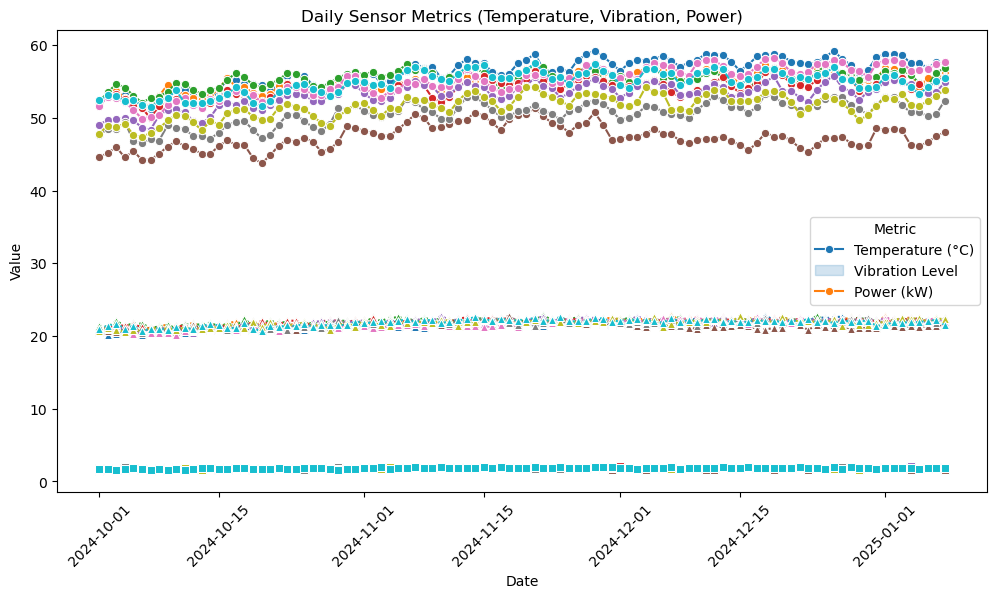

In [57]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=gold_pandas_df, x="date", y="avg_temp_celsius", hue="machine", marker="o")
sns.lineplot(data=gold_pandas_df, x="date", y="avg_vibration_level", hue="machine", marker="s", linestyle="dashed")
sns.lineplot(data=gold_pandas_df, x="date", y="avg_power_kW", hue="machine", marker="^", linestyle="dotted")

plt.title("Daily Sensor Metrics (Temperature, Vibration, Power)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend(title="Metric", labels=["Temperature (°C)", "Vibration Level", "Power (kW)"])
plt.show()

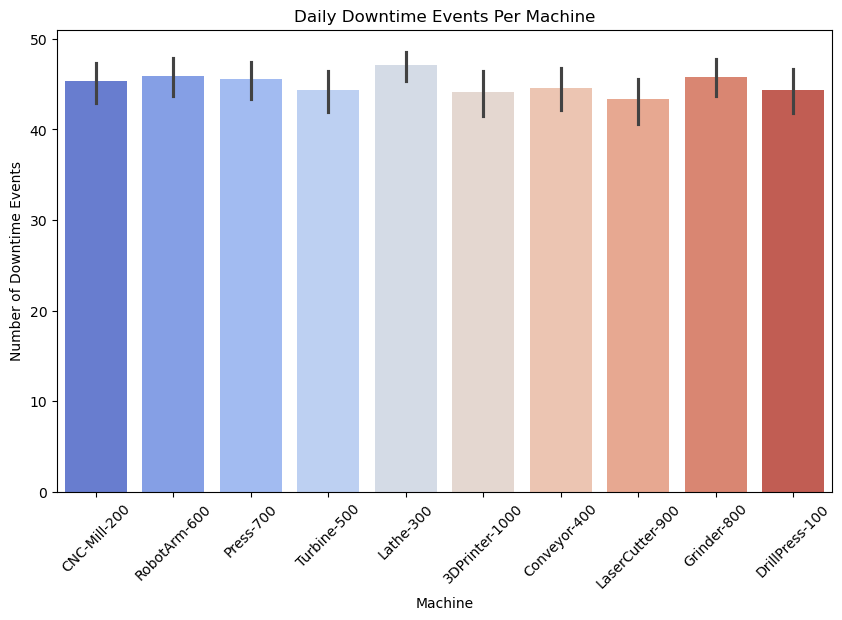

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gold_pandas_df, x="machine", hue="machine", y="downtime_count", palette="coolwarm", legend=False)
plt.title("Daily Downtime Events Per Machine")
plt.xlabel("Machine")
plt.ylabel("Number of Downtime Events")
plt.xticks(rotation=45)
plt.show()

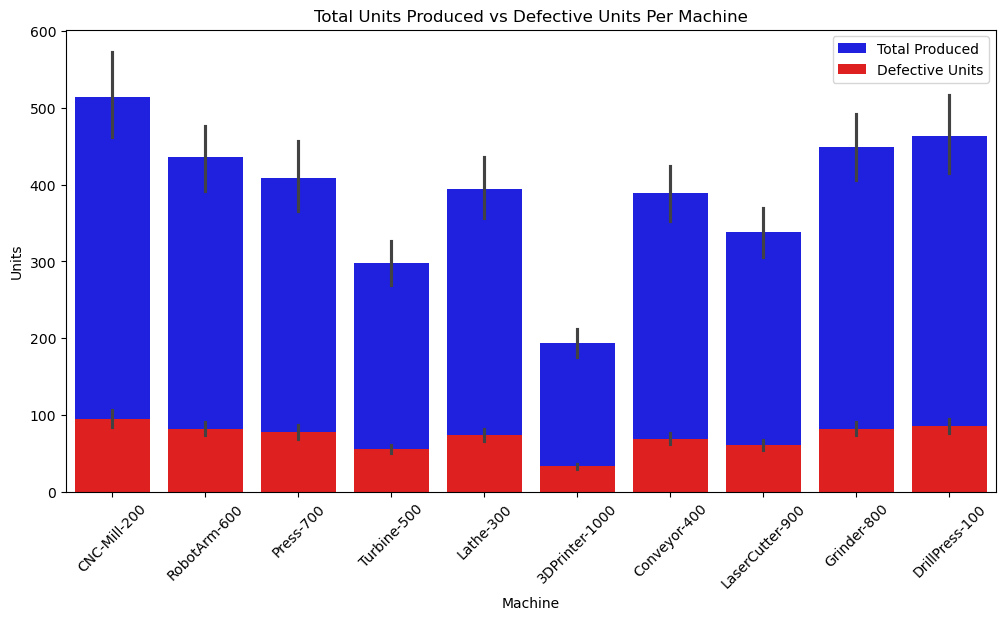

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(data=gold_pandas_df, x="machine", y="total_units_produced", color="blue", label="Total Produced")
sns.barplot(data=gold_pandas_df, x="machine", y="total_defective_units", color="red", label="Defective Units")

plt.title("Total Units Produced vs Defective Units Per Machine")
plt.xlabel("Machine")
plt.ylabel("Units")
plt.xticks(rotation=45)
plt.legend()
plt.show()

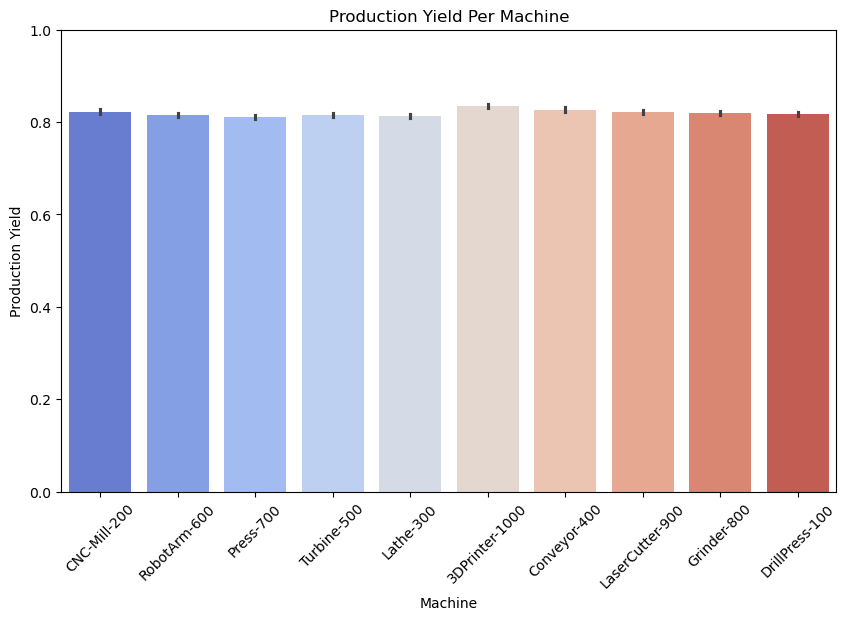

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gold_pandas_df, x="machine", hue="machine", y="production_yield", palette="coolwarm")
plt.title("Production Yield Per Machine")
plt.xlabel("Machine")
plt.ylabel("Production Yield")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

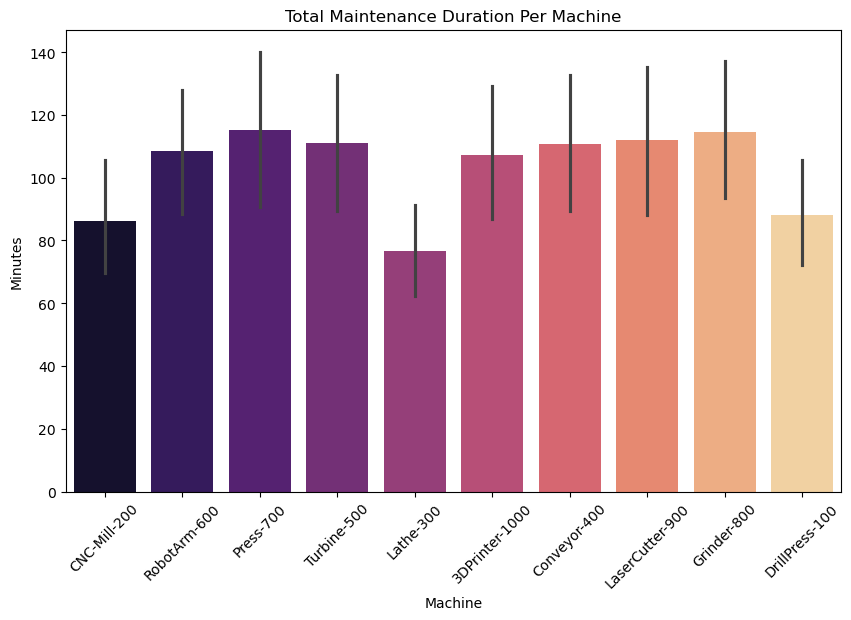

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gold_pandas_df, x="machine", hue="machine", y="total_maintenance_duration", palette="magma")
plt.title("Total Maintenance Duration Per Machine")
plt.xlabel("Machine")
plt.ylabel("Minutes")
plt.xticks(rotation=45)
plt.show()

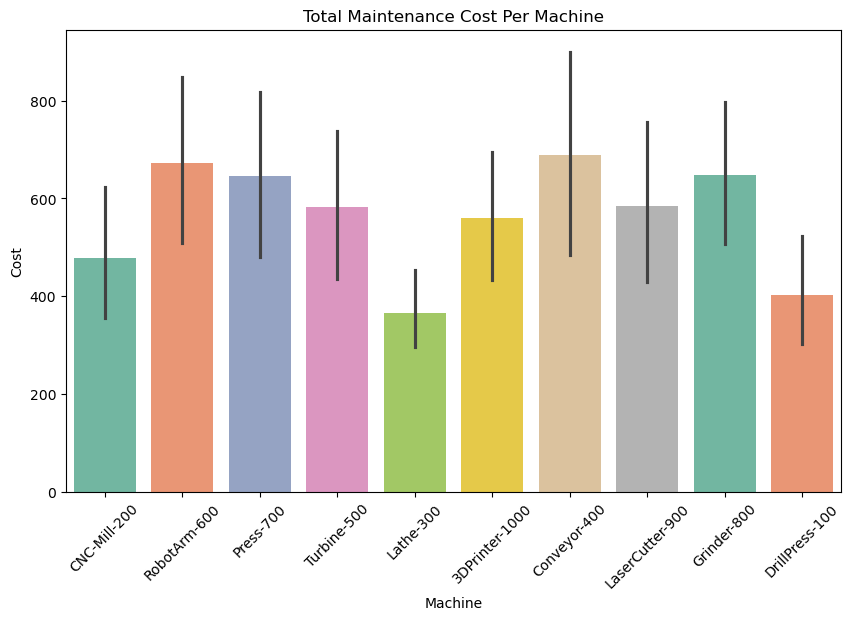

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gold_pandas_df, x="machine", hue="machine", y="total_maintenance_cost", palette="Set2")
plt.title("Total Maintenance Cost Per Machine")
plt.xlabel("Machine")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.show()

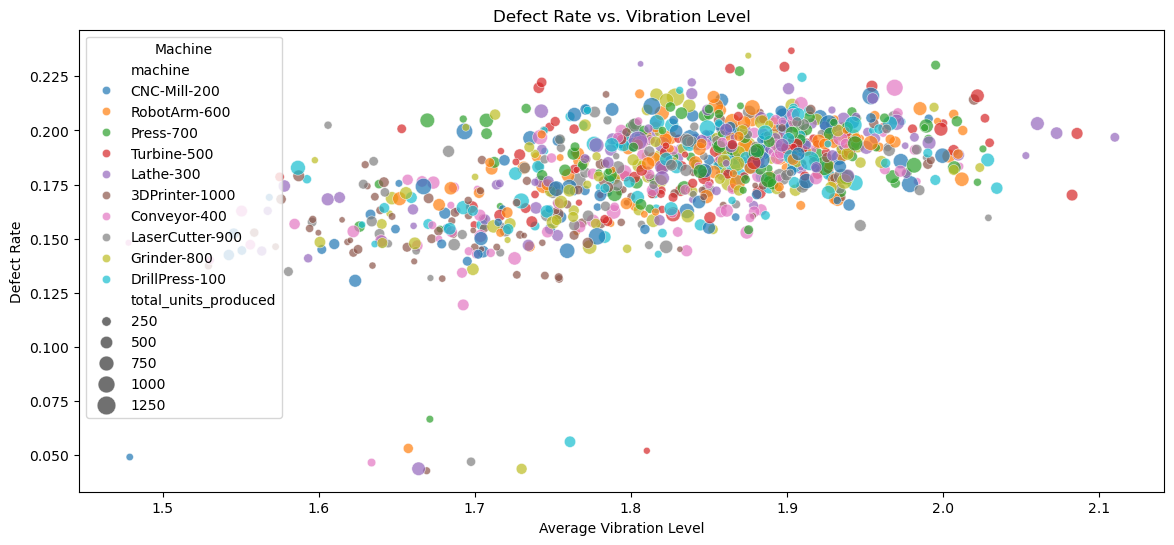

In [64]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=gold_pandas_df, x="avg_vibration_level", y="defect_rate", hue="machine", size="total_units_produced", sizes=(20, 200), alpha=0.7)
plt.title("Defect Rate vs. Vibration Level")
plt.xlabel("Average Vibration Level")
plt.ylabel("Defect Rate")
plt.legend(title="Machine")
plt.show()

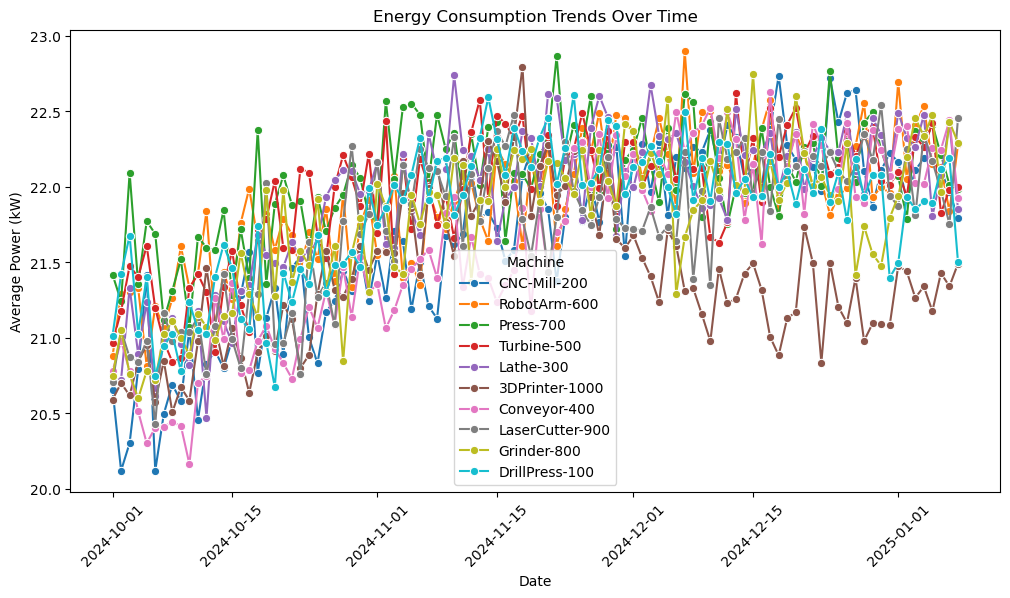

In [65]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=gold_pandas_df, x="date", y="avg_power_kW", hue="machine", marker="o")
plt.title("Energy Consumption Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Average Power (kW)")
plt.xticks(rotation=45)
plt.legend(title="Machine")
plt.show()

## Discussion Questions (6p)

1. **Have we now built a data lakehouse? Why or why not?**  


Yes, by looking at the characteristics of data lakehouses (unified-storage, ACID, scalability, integration with ML etc.) we can say that we have built a basic data lakehouse.

One aspect of lake houses is that they combine the flexibility of data lakes and reliability of data warehouses. We structured data into Bronze, Silver and Gold layers using Delta Lakes; thus, we ensured data consistency and schema enforcement. We then performed data cleaning and standardization in the Silver layerand aggregated bussiness insights in the Gold layer. The use of Delta tables with ACID transactions ensured data integrity, which is one of the advantages Data lakehouses have over data lakes. We also performed automatic schema inference and schema evolution, which allows flexibility in handling changing data structures, which is one of the key aspects of delta lakehouses. Moreover, the dataframe we have in Gold layeris ready for Machine Learnning pipelines.

Data lakehouses can handle both structured and semi- or unstructured data. Since we only had structured data, our implementation could not fully utilize the flexibility of a data lakehouse. Additionally, we did not implement advanced features like indexing or caching, which are common in lakehouse environments.

In overall, our implementation meets the core concepts of a data lakehouse, but it could be even extended to do advanced operations that data warehouses and data lakes are incapable of doing.



2. **How does the medallion architecture enhance data quality and governance in this pipeline?**  


Bronze Layer: This layer stores raw data exactly as extracted from different sources. By keeping a copy of raw data, it preserves data lineage and enables us to recover from errors or reprocess data if needed. Since this layer acts as a historical archive, it ensures data traceability and compliance by maintaining the record of all incoming data. It also provides schema enforcement, preventing invalid records from corrupting the data lake.

Silver Layer: This layer is responsible for cleaning, standardizing, and validating the raw data. We performed the following transformations to improve data quality:
- Renaming columns for consistency.
- Removing duplicate records to eliminate redundancy.
- Handling missing or corrupt values to ensure meaningful analysis.
- Standardizing data types for compatibility across datasets.
- Filtering out invalid sensor readings (e.g., negative values in vibration levels).

All these transformations make our data more structured and high quality. In terms of governance, this layer ensured schema evolution and validation, preventing incorrect data from propogating downstream.

Gold Layer: This layer aggregates and enriches the cleaned data to provide business insights. We created meaningful machine performance metrics such as:
- Daily sensor metrics (e.g., average temperature, vibration levels, power usage).
- Daily Production metrics (e.g., units produced vs. defective units, defect rates).
- Daily maintenance metrics (e.g., analysis (total maintenance duration, cost per machine).
- Adcanced insight such as correlation between vibration levels and defects, energy consumption over time etc.

So this layer provides well-structured, curated datasets for analytics, reporting, and machine learning. It allows for fine-grained access control, ensuring that different user groups can access only relevant data while maintaining security and compliance.



3. **What challenges might arise when scaling this pipeline from batch-based to real-time streaming data?**  

Scaling this pipeline from batch processing to real-time streaming might have some challenges. Data ingestion and latency become critical, requiring tools like Apache Kafka  to handle continuous sensor, production, and maintenance data. Ensuring data quality is harder in a streaming setup, as records may arrive out of order or incomplete, requiring real-time validation and deduplication. Schema evolution also becomes a challenge since unexpected format changes can disrupt processing without proper handling. Additionally, fault tolerance and scalability must be addressed to handle system failures and spikes in data volume efficiently. Lastly, operational costs increase since streaming requires continuous resource usage. 